In [61]:
# generate sum pairs
from random import seed
from random import randint
seed(1234)
from numpy import array, argmax
from pprint import pprint
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.metrics import Accuracy
# from keras.
from math import sin, pi
from matplotlib import pyplot as plt


In [23]:
# damped sine wave  （continously）
length = 100
freq = 5
sequence = [sin(2 * pi * freq * (i/length)) for i in range(length)]

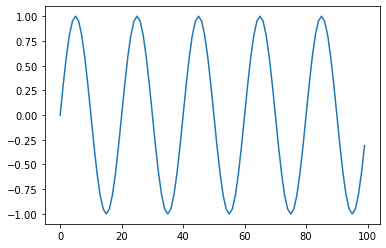

In [24]:
plt.plot(sequence)

In [49]:
# damped sine wave 
from math import exp
period = 10

In [50]:
decay = 0.05
sequences = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

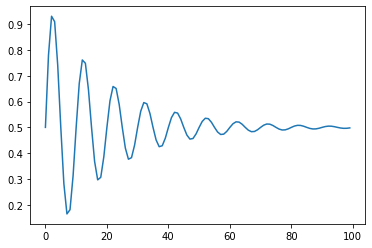

In [35]:
plt.plot(sequences)

In [51]:
# random damped sine wave 
import random
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [52]:
# select random priod and decay
p = random.randint(10, 20)
d = random.uniform(0.01, 0.1)

In [55]:
# generate examples
# n_patterns is how many example, or how many rows do we need
# output is the number of output series we need, eg. last 5 example
# length is the length for X
# output is the length for y
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):  # every example. append x and y independently
        p = random.randint(10, 20)
        d = random.uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)  # length + output is the total length for this function to generate
        X.append(sequence[:output])
        y.append(sequence[output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y
        

In [56]:
X, y = generate_examples(20, 5, 5)  # let it generate 5 example
# for i in range(len(X)):
    

ValueError: cannot reshape array of size 25 into shape (5,20,1)

In [68]:

from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

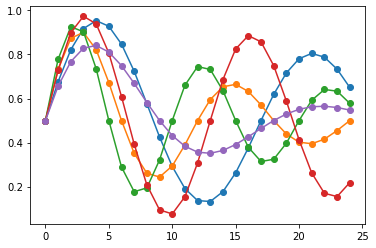

In [70]:

# test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
pyplot.show()

In [72]:
X.shape

(5, 20, 1)

In [ ]:
# define the model 

In [74]:
# make this more real
# configure problem
length = 50
output = 5
# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))  # inout feature is 1 feature. length is the time step
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss= 'mae' , optimizer= 'adam' )
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
X, y = generate_examples(length, 10000, output)
model.fit(X, y, batch_size=10, epochs=1)


1000/1000 [==============================] - 19s 18ms/step - loss: 0.0765


In [76]:
# evaluete model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print(f'MAE is {loss}')

MAE is 0.016850225627422333


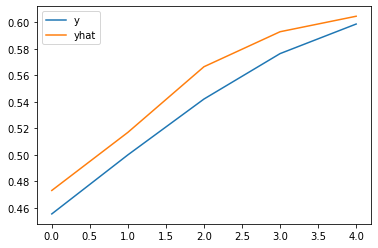

In [79]:
# predict on new data....
import matplotlib.pyplot as plt
X, y = generate_examples(length, 1, output)  # data only have one  series 
yhat = model.predict(X, verbose=0)
plt.plot(y[0], label='y')
plt.plot(yhat[0], label='yhat')
plt.legend()